In [4]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [5]:
import matplotlib.pyplot as plt

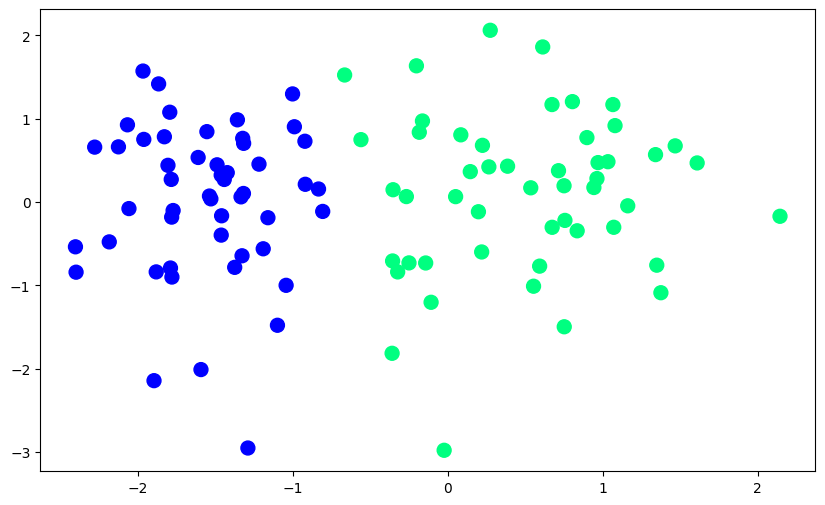

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [10]:
import numpy as np

def step(x):
    """Step activation function: returns 1 if x >= 0, else 0."""
    if x >= 0:
        return 1
    else:
        return 0 
        
def perceptron(X, y, iterations=1000, learning_rate=0.5):
    """
    Trains a Perceptron classifier.
    
    Parameters:
    - X: numpy array of shape (n_samples, n_features)
    - y: numpy array of shape (n_samples,) with binary labels (0 or 1)
    - iterations: number of training iterations (default=1000)
    - learning_rate: learning rate for weight updates (default=0.5)
    
    Returns:
    - bias (float): learned bias term
    - weights (np.array): learned weights for input features
    """
    # Step 1: Add bias term (column of 1s at the beginning)
    # DATA AUGMENTATION
    
    X_bias = np.insert(X, 0, 1, axis=1)
    # [2,3]
    # [2,3,b]

    # Step 2: Initialize weights (including bias) to 1
    weights = np.ones(3)
    print(weights)

    # Step 3: Training loop
    for x in range(100):
        # Randomly select a sample index
        j = np.random.randint(0, len(X))
        # print(j)

        # Predict the output using current weights
        dot_product = np.dot(X_bias[j], weights)
        y_pred = step(dot_product)

        # print(y_pred)

        # Update weights using the perceptron learning rule

        print("old_weights", weights)
        
        weights = weights + learning_rate * (y[j] - y_pred) * X_bias[j]
        
        print("new_weights", weights)

    # Step 4: Return bias and the rest of the weights
    bias = weights[0]
    feature_weights = weights[1:]
    return bias, feature_weights

In [11]:
intercept_,coef_ = perceptron(X,y)

[1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [0.5        1.49410624 0.54836294]
old_weights [0.5        1.49410624 0.54836294]
new_weights [0.5        1.49410624 0.54836294]
old_weights [0.5        1.49410624 0.54836294]
new_weights [0.5        1.49410624 0.54836294]
old_weights [0.5        1.49410624 0.54836294]
new_weights [0.5        1.49410624 0.54836294]
old_weights [0.5        1.49410624 0.54836294]
new_weights [0.5        1.49410624 0.54836294]
old_weights [0.5        1.49410624 0.54836294]
new_weights [0.5        1.49410624 0.54836294]
old_weights [0.5        1.49410624 0.54836294]
new_weights [0.5        1.49410624 0.54836294]
old_weights [0.5        1.49410624 0.54836294]
new_weights [0.5        1.494106

In [12]:
print(coef_)
print(intercept_)

[1.22189921 0.63920995]
1.5


In [13]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [14]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

In [15]:
m,b = perceptron(X,y)

[1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [1. 1. 1.]
old_weights [1. 1. 1.]
new_weights [0.5        1.46008738 0.63534118]
old_weights [0.5        1.46008738 0.63534118]
new_weights [0.5        1.46008738 0.63534118]
old_weights [0.5        1.46008738 0.63534118]
new_weights [0.5        1.46008738 0.63534118]
old_weights [0.5        1.46008738 0.63534118]
new_weights [0.5        1.46008738 0.63534118]
old_weights [0.5        1.46008738 0.63534118]
new_weights [0.5        1.46008738 0.63534118]
old_weights [0.5        1.46008738 0.63534118]
new_weights [1.         1.29919646 0.21560574]
old_weights [1.         1.29919646 0.21560574]
new_weights [1.         1.29919646 0.21560574]
old_weights [1.         1.29919646 0.21560574]
new_weights [1.         1.29919646 0.21560574]
old_weights [1.         1.29919646 0.21560574]
new_weights [1.         1.2991

NameError: name 'X' is not defined

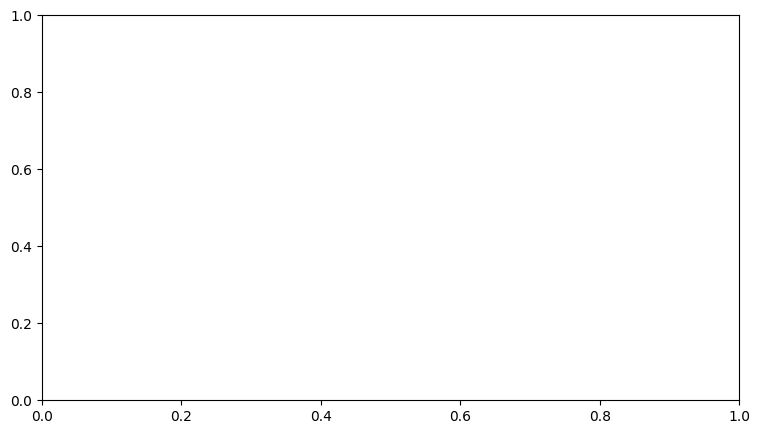

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample training results: slopes and intercepts for each epoch
frames = 2000
m = np.linspace(0.5, 2.0, frames)   # example slope values over epochs
b = np.linspace(-1.0, 1.0, frames)  # example intercept values over epochs

# Prepare the plot
fig, ax = plt.subplots(figsize=(9, 5))
x_i = np.arange(-3, 3, 0.1)

# Assuming X and y are already defined (your scatter data)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

# Initialize the line with first epoch's values
line, = ax.plot(x_i, x_i * m[0] + b[0], 'r-', linewidth=2)
ax.set_ylim(-3, 3)

# Update function for animation
def update(i):
    line.set_ydata(x_i * m[i] + b[i])
    ax.set_xlabel(f'epoch {i + 1}')
    return line, ax

# Create the animation
anim = FuncAnimation(fig, update, frames=frames, interval=100, repeat=True)
anim.save("Output.gif")
plt.show()
